In [1]:
import xarray as xr
import numpy as np
import glob
import typhon
import matplotlib.pyplot as plt
from os.path import join
plt.style.use(typhon.plots.styles.get('typhon')) 

In [3]:
data_dir = "/work/mh0287/m300057/NextGEMS/"
runs = ["dpp0029", "dpp0033", "dpp0016", "dpp0052"]

In [4]:
# constants:
alv = 2.5008e6
als = 2.8345e6

# pr: everything (liquid parts + solid parts)
# prls: solid parts

# [alv] = J/kg
# [pr] = kg/m^2/s
# [alv * pr] = J/m^2/s

# [dse] = m^2/s^2
# [prw] = kg/m^2
# [alv * prw] = J/m^2

Energy budget:
-rlut + rlus - rlds + rsdt - rsut - rsds + rsus - hfss + alv pr + (als-alv) prls

In [5]:
ds = {}
for run in runs:
    file = join(data_dir, f'{run}_atm_2d_ml_daymean_fldmean.nc')
    ds[run] = xr.open_dataset(file)

In [9]:
for run in runs:
    ds[run]["e_budget"] = -ds[run].rlut + ds[run].rlus - ds[run].rlds\
    + ds[run].rsdt - ds[run].rsut - ds[run].rsds + ds[run].rsus\
    - ds[run].hfss + alv*ds[run].pr + (als-alv)*ds[run].prls

$$
\text{moist static energy} = c_{pd} T + gz + L_v q
$$
[-> Metpy](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.moist_static_energy.html?highlight=moist%20static#metpy.calc.moist_static_energy), following equation 3.72 in [Hobbs (2006)](https://unidata.github.io/MetPy/latest/api/references.html#hobbs2006)

In [23]:
ds["dpp0052"]["mse"] = (ds["dpp0052"].cptgzvi + ds["dpp0052"].prw * alv ) / (24*60*60)

print(ds["dpp0052"].cptgzvi.long_name) # vert_int_dry_static_energy
print(ds["dpp0052"].prw.long_name) # vertically integrated water vapour

vert_int_dry_static_energy
vertically integrated water vapour


Text(0, 0.5, 'Energy budget [W m$^{-2}$]')

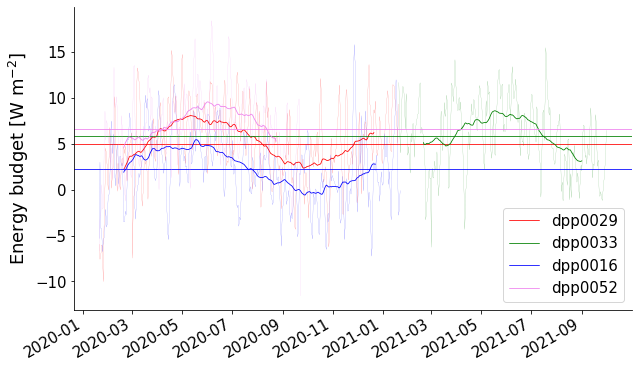

In [74]:

def running_mean(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
n = 30
colors = ['red', 'green', 'blue', 'violet']

fig, ax = plt.subplots()
for i, run in enumerate(runs):
    color=colors[i]
    ax.plot(ds[run].time, np.squeeze(ds[run].e_budget), linewidth=0.1, color=color)
    ax.axhline(np.mean(np.squeeze(ds[run].e_budget)), color=color, label=run, lw=0.8)
    ax.plot(ds[run].time[n:-n], running_mean(np.squeeze(ds[run].e_budget.values),n=(n*2 +1)), color=color, linewidth=0.8 )
ax.legend()
plt.gcf().autofmt_xdate()
ax.set_ylabel('Energy budget [W m$^{-2}$]')



(-15.0, 15.0)

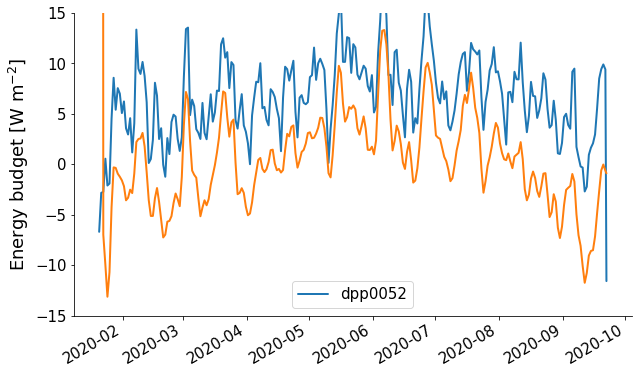

In [25]:
fig, ax = plt.subplots()
for run in ["dpp0052"]:
    ax.plot(ds[run].time, np.squeeze(ds[run].e_budget), label=run)
    ax.plot(ds[run].time, np.gradient(np.squeeze(ds[run].mse)))
ax.legend()
plt.gcf().autofmt_xdate()
ax.set_ylabel('Energy budget [W m$^{-2}$]')
ax.set_ylim(-15, 15)